In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

In [ ]:
paths = '/content/drive/MyDrive/DataAnalysis/Tabular Playground Series - Mar 2021/data/'

train = pd.read_csv(paths + 'train.csv')
test = pd.read_csv(paths + 'test.csv')
submission = pd.read_csv(paths + 'sample_submission.csv')

In [ ]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,A,LF,A,A,A,A,B,D,D,B,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,A,MC,A,A,A,B,D,B,D,B,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,A,FN,A,A,A,B,B,D,D,B,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,A,HK,A,A,A,A,B,D,B,B,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,A,HX,A,A,A,A,D,D,D,B,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cat10   200000 non-null  object 
 12  cat11   200000 non-null  object 
 13  cat12   200000 non-null  object 
 14  cat13   200000 non-null  object 
 15  cat14   200000 non-null  object 
 16  cat15   200000 non-null  object 
 17  cat16   200000 non-null  object 
 18  cat17   200000 non-null  object 
 19  cat18   200000 non-null  object 
 20  cont0   200000 non-null  float64
 21  cont1   20

In [ ]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [ ]:
test.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,249723.611455,0.505388,0.493960,0.516425,0.475286,0.504772,0.501180,0.487315,0.502684,0.488331,0.469813,0.508974
std,144363.694402,0.207417,0.212695,0.214752,0.216919,0.227199,0.241375,0.211335,0.203793,0.178895,0.194999,0.203926
min,5.000000,-0.044929,0.090478,0.098591,-0.038178,0.171321,-0.036337,-0.005648,0.096067,0.013554,0.215540,0.113059
25%,124460.250000,0.344748,0.317788,0.326210,0.292777,0.279413,0.275422,0.322365,0.353388,0.359121,0.309888,0.368999
50%,249679.500000,0.479633,0.463195,0.470893,0.392118,0.480299,0.554723,0.517318,0.436139,0.411318,0.407066,0.446578
75%,374661.250000,0.638773,0.693882,0.704745,0.645803,0.725272,0.735137,0.607454,0.646104,0.612508,0.588008,0.583082
max,499998.000000,1.006825,1.011597,1.012128,0.965609,0.867198,0.848617,0.964635,1.033760,1.053155,1.007189,1.007168


In [ ]:
print("-- Size -- ")
print(f"Train-set : {train.shape}")
print(f"Test-set  : {test.shape}")

-- Size -- 
Train-set : (300000, 32)
Test-set  : (200000, 31)


In [ ]:
# Train-set에만 있는 칼럼은?
train.columns.difference( test.columns )

Index(['target'], dtype='object')

## Target 분포 확인

In [ ]:
np.sort(train['target'].unique())

array([0, 1])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


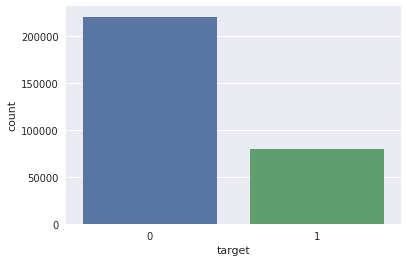

In [ ]:
sns.countplot(train['target'])

## Train과 Test의 차이 확인

In [ ]:
# 각 칼럼별 고유한 데이터의 값과 개수를 나타내는 함수
def getUniqueData(train, test, col):
  unique_data_train = set(train[col].unique())
  unique_count_train = train[col].nunique()

  unique_data_test = set(test[col].unique())
  unique_count_test = test[col].nunique()
  print('='* 100)
  
  print(f'{col}의 고유한 Train data의 개수는: {unique_count_train}')
  print(f'{col}의 고유한 Test data의 개수는: {unique_count_test}')
  if unique_count_train >= 50: print(f'{col}의 고유한 Train 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f'{col}의 고유한 Train 데이터는: {sorted(unique_data_train)}')
  if unique_count_test >= 50: print(f'{col}의 고유한 Test 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f'{col}의 고유한 Test 데이터는: {sorted(unique_data_test)}')
  
  print()

  only_train_data = unique_data_train.difference(unique_data_test)
  print(f"{col}의 Train-set에만 있는 데이터는 총 { len(only_train_data) }개 입니다.")
  if len(only_train_data) >= 50: print(f'{col}의 Train-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f"{col}의 Train-set에만 있는 데이터는 : { sorted(only_train_data) }")

  only_test_data = unique_data_test.difference(unique_data_train)
  print(f"{col}의 Test-set에만 있는 데이터는 총 { len(only_test_data) }개 입니다.")
  if len(only_test_data) >= 50: print(f'{col}의 Test-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.')
  else: print(f"{col}의 Test-set에만 있는 데이터는 : { sorted(only_test_data) }")

  print('='* 100)

In [ ]:
cols = test.columns
for col in cols:
  getUniqueData(train, test, col)

id의 고유한 Train data의 개수는: 300000
id의 고유한 Test data의 개수는: 200000
id의 고유한 Train 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
id의 고유한 Test 데이터의 개수가 50개를 넘어 시각화하지 않습니다.

id의 Train-set에만 있는 데이터는 총 300000개 입니다.
id의 Train-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
id의 Test-set에만 있는 데이터는 총 200000개 입니다.
id의 Test-set에만 있는 데이터의 개수가 50개를 넘어 시각화하지 않습니다.
cat0의 고유한 Train data의 개수는: 2
cat0의 고유한 Test data의 개수는: 2
cat0의 고유한 Train 데이터는: ['A', 'B']
cat0의 고유한 Test 데이터는: ['A', 'B']

cat0의 Train-set에만 있는 데이터는 총 0개 입니다.
cat0의 Train-set에만 있는 데이터는 : []
cat0의 Test-set에만 있는 데이터는 총 0개 입니다.
cat0의 Test-set에만 있는 데이터는 : []
cat1의 고유한 Train data의 개수는: 15
cat1의 고유한 Test data의 개수는: 15
cat1의 고유한 Train 데이터는: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
cat1의 고유한 Test 데이터는: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

cat1의 Train-set에만 있는 데이터는 총 0개 입니다.
cat1의 Train-set에만 있는 데이터는 : []
cat1의 Test-set에만 있는 데이터는 총 0개 입니다.
cat1의 Test-set에만 있는 데이터는 : []
cat2의 고유한 Train data의 개수는: 19
cat2의 고

# BaseLine Model


In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
# 속도 체크
from tqdm import tqdm_notebook

# 원본데이터의 변형을 막고자 데이터를 copy함
temp_train = train.copy()
temp_test = test.copy()

lbl = LabelEncoder()

# Implement Label Encoding 
cat_cols =  ['cat'+str(i) for i in range(0, 19)]
for col in tqdm_notebook( cat_cols ):
    # local_train과 local_test를 concat하여 temp_df에 저장
    temp_df = pd.concat([ temp_train[[col]], temp_test[[col]] ] , axis=0)
    
    # Label-Encoding을 fitting함
    lbl.fit( temp_df[col] )
    
    # local_train/local_test에 label_encoding한 값을 대입함
    temp_train[col] = lbl.transform(temp_train[col])
    temp_test[col] = lbl.transform(temp_test[col])

target = 'target'
drop_features = ['id']

X_train = temp_train.drop(labels = drop_features + [target], axis=1)
y_train = temp_train[target]

X_test = temp_test.drop(labels = drop_features, axis=1)

In [ ]:
# 데이터 분할
from sklearn.model_selection import StratifiedKFold

# 모델
from sklearn.ensemble import RandomForestClassifier
import lightgbm as LGBM
import xgboost as XGB

# 속도 체크
from tqdm import tqdm_notebook

# 성능체크
from sklearn.metrics import roc_auc_score

# CV는 5로
n_split = 5

# 균등하게 니눌때 사용
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

# train 데이터에 대한 예측 값이 저장될 배열
rf_oof_train = np.zeros(y_train.shape)
lgbm_oof_train = np.zeros(y_train.shape)
xgb_oof_train = np.zeros(y_train.shape)

# test 데이터에 대한 예측 값이 저장될 배열
rf_oof_test = np.zeros((X_test.shape[0], ))
lgbm_oof_test = np.zeros((X_test.shape[0], ))
xgb_oof_test = np.zeros((X_test.shape[0], ))

rf = RandomForestClassifier(random_state = 22)

lgbm = LGBM.LGBMClassifier(random_state = 22, 
                          tree_method = 'gpu_hist', 
                          predictor = 'gpu_predictor',
                          n_estimators = 300,
                          max_depth = 4,
                          min_child_weight = 6,
                          subsample = 0.7)

xgb = XGB.XGBClassifier(random_state = 22, 
                       tree_method = 'gpu_hist', 
                       predictor = 'gpu_predictor')

# oof 방식을 통한 예측
for trn_idx, val_idx in tqdm_notebook(skf.split(X_train, y_train)):
  trn_data, trn_label = X_train.iloc[trn_idx], y_train.iloc[trn_idx]
  val_data, val_label = X_train.iloc[val_idx], y_train.iloc[val_idx]

  # RandomForestRegressor
  rf.fit(trn_data, trn_label)
  rf_valid_pred = rf.predict_proba(val_data)[:, 1]
  rf_oof_train[val_idx] = rf_valid_pred

  rf_test_pred = rf.predict_proba(X_test)[:, 1]
  rf_oof_test += rf_test_pred / n_split

  # LGBMRegressor
  lgbm.fit(trn_data, trn_label)
  lgbm_valid_pred = lgbm.predict_proba(val_data)[:, 1]
  lgbm_oof_train[val_idx] = lgbm_valid_pred

  lgbm_test_pred = lgbm.predict_proba(X_test)[:, 1]
  lgbm_oof_test += lgbm_test_pred / n_split

  # XGBRegressor
  xgb.fit(trn_data, trn_label)
  xgb_valid_pred = xgb.predict_proba(val_data)[:, 1]
  xgb_oof_train[val_idx] = xgb_valid_pred

  xgb_test_pred = xgb.predict_proba(X_test)[:, 1]
  xgb_oof_test += xgb_test_pred / n_split

In [ ]:
print("LGBMRegressor         :{} ".format( roc_auc_score(y_train, lgbm_oof_train) ))

LGBMRegressor         :0.8893816087346288 


In [ ]:
print("RandomForestRegressor :{} ".format( roc_auc_score(y_train, rf_oof_train) ))
print("LGBMRegressor         :{} ".format( roc_auc_score(y_train, lgbm_oof_train) ))
print("XGBRegressor          :{} ".format( roc_auc_score(y_train, xgb_oof_train) ))

RandomForestRegressor :0.8836415555517213 
LGBMRegressor         :0.8887554234584405 
XGBRegressor          :0.8803852479096517 


In [ ]:
submission['target'] = rf_oof_test
submission.to_csv('RandomForestClassifier.csv', index=False)
submission.head()

,id,target
0,5,0.178
1,6,0.536
2,8,0.022
3,9,0.140
4,11,0.100


0.88101

In [ ]:
submission['target'] = lgbm_oof_test
submission.to_csv('LGBMClassifier.csv', index=False)
submission.head()

,id,target
0,5,0.126730
1,6,0.570206
2,8,0.052725
3,9,0.204059
4,11,0.149404


0.88427

In [ ]:
submission['target'] = xgb_oof_test
submission.to_csv('XGBClassifier.csv', index=False)
submission.head()

,id,target
0,5,0.082234
1,6,0.588657
2,8,0.115668
3,9,0.146764
4,11,0.123821


0.87502
